In [32]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
x = np.linspace(-5, 5, 10_000)
x = np.expand_dims(x, axis=-1)
y = x ** 3

In [34]:
SPLIT = 0.5

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - SPLIT)



In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="tanh", input_shape=(1,)),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear"),
])

C:\Users\jorge.ruiz\AppData\Local\Programs\Python\Python310\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)


In [36]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [37]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [38]:
model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/1000
157/157 [==============================] - 1s 3ms/step - loss: 2183.4292 - mse: 2183.4292 - val_loss: 2112.4905 - val_mse: 2112.4905
Epoch 2/1000
157/157 [==============================] - 0s 3ms/step - loss: 2118.9958 - mse: 2118.9958 - val_loss: 2066.1145 - val_mse: 2066.1145
Epoch 3/1000
157/157 [==============================] - 0s 3ms/step - loss: 2075.9883 - mse: 2075.9883 - val_loss: 2026.4730 - val_mse: 2026.4730
Epoch 4/1000
157/157 [==============================] - 0s 3ms/step - loss: 2037.8531 - mse: 2037.8531 - val_loss: 1990.0994 - val_mse: 1990.0994
Epoch 5/1000
157/157 [==============================] - 0s 3ms/step - loss: 2002.1360 - mse: 2002.1360 - val_loss: 1955.3826 - val_mse: 1955.3826
Epoch 6/1000
157/157 [==============================] - 0s 3ms/step - loss: 1967.2563 - mse: 1967.2563 - val_loss: 1921.0483 - val_mse: 1921.0483
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 1932.7662 - mse: 1932.7662 - val_loss: 1887.0479

313/313 [==============================] - 0s 601us/step


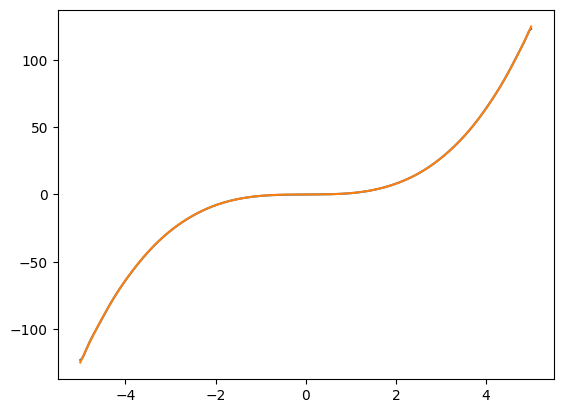

In [39]:
res = model.predict(x)

plt.plot(x, res, x, y)

In [41]:
model.save("model.h5")
np.save("x.npy", x)
np.save("y.npy", y)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)